


# Tutorial 1 -- Signal and Frequency

<br></br>
<div class="author">Sheng (Ethan) LYU</div>

<div class="date">Date: 2025-02-18</div>



### Prerequisite

- Lab 0: Read it before you start
    - Logistics
    - Grading
    - Submission
    - Moodle
    - Email
    - Office Hour

## Data Analytics for IoT

- IoT: Sensing & Connectivity
- Carrier of Sensing Data: Signal
- Signal encompasses anything that can be perceived
    - Audio, Video, Wi-Fi, Radar, ..., etc.

## Start from signals

- <span class="fragment"> A "function" of time, amplitude, phase </span>
    - <span class="fragment"> Determine the function </span>
    - <span class="fragment"> Construct the time, amplitude and phase
    - <span class="fragment"> Wrap them up!
- <span class="fragment"> Signals:
    - <span class="fragment"> Pure Tone
    - <span class="fragment"> Chirp Signal

### Lab 1-2-1 Linear Chirp

- Question: Finish 
```python
def generate_linear_chirp(amplitude, period, duration, start_freq, end_freq, init_phase)
```
- <span class="fragment"> Recall definition of chirp
    $$
        s(t) = A \cdot \cos(2 \pi \int_{0}^{t} f(t) dt  + \phi)
    $$
    
- <span class="fragment"> What we have:
    - <span class="fragment"> duration -> timestamps
    - <span class="fragment"> f(t): start_freq, end_freq, f, period
    - <span class="fragment"> Amplitude
    - <span class="fragment"> Phase

In [57]:
import numpy as np
fs = 1000
amplitude = 1 
period = 1 
duration = 2
start_freq, end_freq = 1, 1000
init_phase = 0

t = ...
f_t = ...
s_t = ...

### Plot it

Text(0, 0.5, 's(t)')

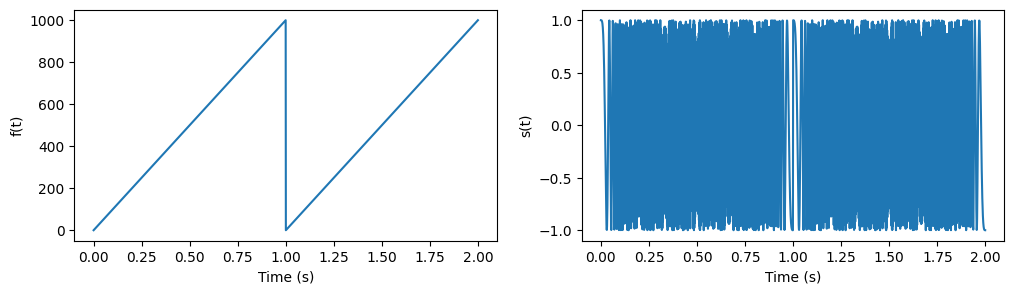

In [58]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(t, f_t)
plt.xlabel("Time (s)")
plt.ylabel("f(t)")

plt.subplot(1, 2, 2)
plt.plot(t, s_t)
plt.xlabel("Time (s)")
plt.ylabel("s(t)")


### How to check

```
python check.py --task <TASK_ID>
```

- Test the docstring: check the format / test basic cases


### How to submit

```
python check.py --uid <YOUR_UID>
```

- Test the docstring: check the format / test basic cases
- Zip your files
- **Upload the *.zip file to Moodle**.


## Recap Pure Tone

$$
s(t) = A \cdot \cos(2 \pi \cdot \color{blue}f\color{black} \cdot \color{red}t\color{black} + \phi).
$$

<div class="two-column-layout">
    <div class="left-column">
        <figure>
             <img src="./example_data/pure_tone_demo.png" alt="Time Domain">
            <figcaption>Time Domain (Function of $t$)</figcaption>
        </figure>
    </div>
    <div class="right-column">
    </div>
</div>



## Recap Pure Tone

$$
s(t) = A \cdot \cos(2 \pi \cdot \color{blue}f\color{black} \cdot \color{red}t\color{black} + \phi).
$$

<div class="two-column-layout">
    <div class="left-column">
        <figure>
             <img src="./example_data/pure_tone_demo.png" alt="Time Domain">
            <figcaption>Time Domain (Function of $t$)</figcaption>
        </figure>
    </div>
    <div class="right-column">
        <figure>
             <img src="./example_data/frequency_domain.png" alt="Frequency Domain">
            <figcaption>Frequency Domain (Function of $f$)</figcaption>
        </figure>
    </div>
</div>



## Recap Pure Tone

$$
s(t) = A \cdot \cos(2 \pi \cdot \color{blue}f\color{black} \cdot \color{red}t\color{black} + \phi).
$$

<div class="two-column-layout">
    <div class="left-column">
        <figure>
             <img src="./example_data/pure_tone_demo.png" alt="Time Domain">
            <figcaption>Time Domain (Function of $t$)</figcaption>
        </figure>
    </div>
    <div class="right-column">
        <figure>
             <img src="./example_data/frequency_domain_ans.png" alt="Frequency Domain">
            <figcaption>Frequency Domain (Function of $f$)</figcaption>
        </figure>
    </div>
</div>

<span class="fragment">
    <div class="rounded-box">
        <b>Can we get frequency domain in a program way?</b>
    </div>
</span>



## Fast Fourier Transform (FFT)

- <span class="fragment">A mathematical technique that converts a signal from the temporal (time) domain to the frequency domain </span>
- <span class="fragment">Frequency domain shares the same information with time domain </span>
- <span class="fragment">An analogy: Story telling in two ways:
    - <span class="fragment"> Way 1: Unfold over time </span>
    - <span class="fragment"> Way 2: Categorize the themes </span>

## Perform FFT on Pure Tone

In [59]:
import numpy as np
from scipy.fft import fft, fftfreq

fs = 500 
f = 50
t = np.arange(-1, 1, 1/fs)
s_t = np.cos(2 * np.pi * f * t)

s_f = fft(s_t)
s_f = np.abs(s_f)
n = s_f.shape[0]
freq = fftfreq(n, 1/fs)

Text(0, 0.5, 'Magnitude')

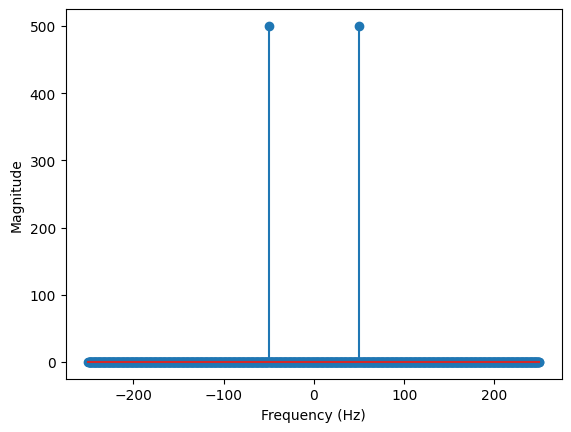

In [60]:
from matplotlib import pyplot as plt
plt.stem(freq, s_f)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude") 

### Notes on FFT

- <span class="fragment"> Only **half** of the information is useful </span>
    - <span class="fragment"> We extract the first half</span>
- <span class="fragment"> FFT result is complex number.</span>
    - <span class="fragment"> We care about the magnitude, thus performing `np.abs`. </span>
- <span class="fragment"> Frequency is acquired from `fftfreq`, and the maximum frequency is $f_s/2$ </span>

### Notes on FFT

In [61]:
from scipy.fft import fft, fftfreq
def get_FFT(s_t, fs, n):
    s_f = ...
    s_f_freq = ...
    return s_f, s_f_freq

## What does $f$ mean?

- Pure Tone Signal: 
    - $f=5$Hz => Signal cycles 5 times per second 
    - Period: $T = \frac{1}{f} = 0.2s$




- Other signals?
    - <span class="fragment"> All signals have frequency domain. </span>
    - <span class="fragment"> The signal itself does not repeat, but some patterns do </span>
    - <span class="fragment"> Decompose the signals into different frequency components </span>

## What does $f$ mean?

<div style="text-align: center;">
<figure>
    <img src="./example_data/fft_illu.png" alt="FFT illustration" style="display: inline-block;" >
</figure>
</div>


## Example: Sum of Pure Tones

$$
s(t) = \cos(2 \pi \cdot f_1 \cdot t) + \cos(2 \pi \cdot f_2 \cdot t)
$$
where $f_1 = 5Hz$, and $f_2 = 8Hz$. Time range is $[-1,1)$s. Sampling rate $f_s = 30Hz$.

In [62]:
import numpy as np
from scipy.fft import fft, fftfreq

fs, f_1, f_2 = 30, 5, 8
t = np.arange(-1, 1, 1/fs)
s_t = np.cos(2 * np.pi * f_1 * t) + np.cos(2 * np.pi * f_2 * t)

s_f = np.abs(fft(s_t))
n = len(s_f)
s_f_freq = fftfreq(n, 1/fs)
s_f = s_f[:n//2]
s_f_freq = s_f_freq[:n//2]

## Example: Sum of Pure Tones

$$
s(t) = \cos(2 \pi \cdot f_1 \cdot t) + \cos(2 \pi \cdot f_2 \cdot t)
$$
where $f_1 = 5Hz$, and $f_2 = 8Hz$. Time range is $[-1,1)$s. Sampling rate $f_s = 30Hz$.

Text(0, 0.5, 'Magnitude')

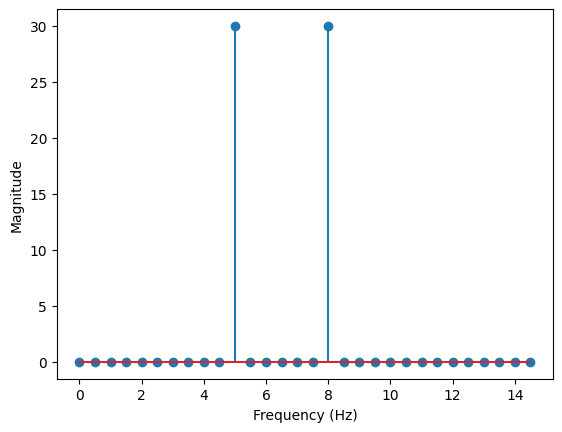

In [63]:
from matplotlib import pyplot

plt.stem(s_f_freq, s_f)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

<span class="fragment">
    <div class="rounded-box">
        <b>How can we get the frequency corresponding to the peak?</b>
    </div>
</span>

## Get Frequency from FFT

In [64]:
from scipy.signal import find_peaks

x, _ = find_peaks(s_f, height=10, prominence=10) 
for i, f in enumerate(s_f_freq[x]):
    print(f"Frequency {i}: {f} Hz")

Frequency 0: 5.0 Hz
Frequency 1: 8.0 Hz


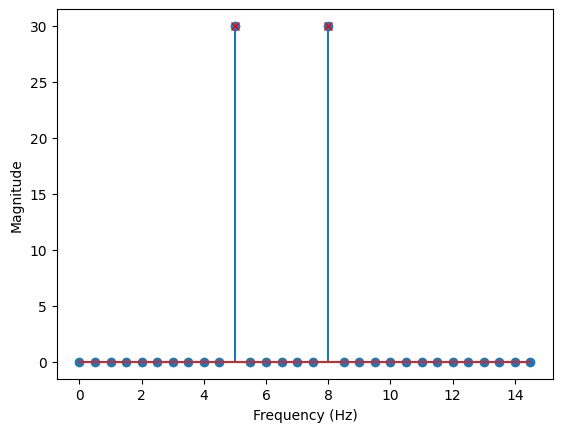

In [65]:
plt.stem(s_f_freq, s_f)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.plot(s_f_freq[x], s_f[x], "x", color="red")

## Sampling Rate $f_s$

- Digital & Analog Signal
    - <span class="fragment"> Analog signal is continous; while digital signal is discrete.</span>
    - <span class="fragment">Computers can only deal with digital signal.</span>
    - <span class="fragment">Turn continuous signal to digital signal involves two processes:</span>
        - <span class="fragment">**Sampling**: Map the temporal domain</span>
        - <span class="fragment">Quantization: Map the value</span>

   

## Sampling Rate $f_s$

- <span class="fragment">Core Relationship:
    $$
    T = N \cdot f_s
    $$</span>
    - <span class="fragment"> $T$: Duration (s) </span>
    - <span class="fragment"> $N$: Number of samples </span>
    - <span class="fragment"> $f_s$: Sampling Rate (Hz) </span>

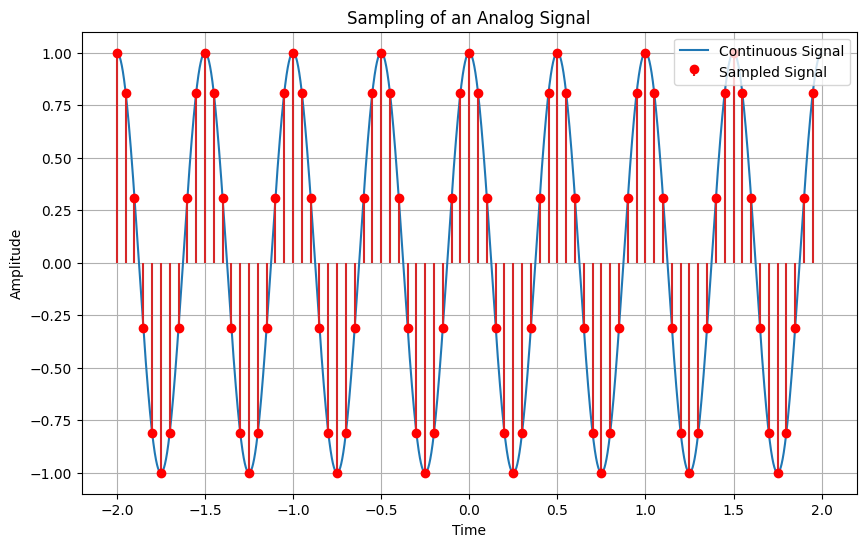

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 20  # Sampling frequency
f = 2    # Signal frequency
t = np.arange(-2, 2, 1/fs)  # Time vector for sampling
s_t = np.cos(2 * np.pi * f * t)  # Sampled signal

# Continuous signal for comparison
t_continuous = np.arange(-2, 2, 1./1000)  # More points for a smoother curve
s_t_continuous = np.cos(2 * np.pi * f * t_continuous)
 
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, s_t_continuous, label='Continuous Signal', color='tab:blue')
plt.stem(t, s_t, 'r', markerfmt='ro', basefmt=" ", linefmt='tab:red', label='Sampled Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sampling of an Analog Signal')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

## Sampling Rate $f_s$

- Core Relationship: $ T = N \cdot f_s$
    - <span class="fragment">$f_s\uparrow$: More fine-grained wave; $N \uparrow$, increase computation cost</span>
    - <span class="fragment">$f_s\downarrow$: Coarse-grained wave; $N \downarrow$, decrease computation cost</span>


<span class="fragment">
    <div class="rounded-box">
        <b>What is the lower bound of $f_s$?</b>
    </div>
</span>

### Lower bound of  $f_s$

- To capture higher frequency components in a signal, a higher sampling rate is required
- <span class="fragment">Nyquist Sampling theorem: The sampling rate should be at least twice the highest frequency component in the signal to accurately capture all the information (avoid aliasing), i.e.
    $$
    f_s > 2 \cdot f_{\max}
    $$
</span>

### Nyquist Sampling theorem

$$
s(t) = \cos(2 \pi \cdot f \cdot t)
$$

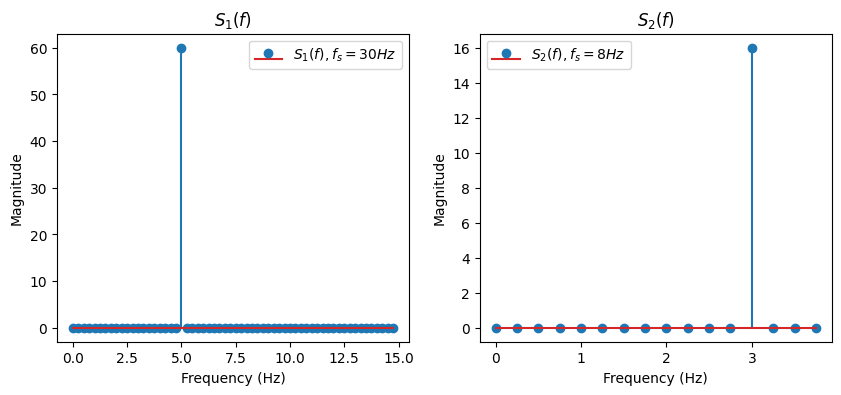

In [67]:
fs_1 = 30  # Sampling Frequency 1
fs_2 = 8   # Sampling Frequency 2

f = 5 # Frequency

t_1 = np.arange(-2, 2, 1/fs_1)  # Time vector
t_2 = np.arange(-2, 2, 1/fs_2)  # Time vector

s_t_1 = np.cos(2*np.pi*f*t_1)
s_t_2 = np.cos(2*np.pi*f*t_2)


s_f_1, s_f_1_freq = get_FFT(s_t_1, n=len(s_t_1), fs=fs_1)
s_f_2, s_f_2_freq = get_FFT(s_t_2, n=len(s_t_2), fs=fs_2)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(s_f_1_freq, s_f_1, label=f"$S_1(f), f_s={fs_1}Hz$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("$S_1(f)$")
plt.legend(loc="upper right")

plt.subplot(1, 2, 2)
plt.stem(s_f_2_freq, s_f_2, label=f"$S_2(f), f_s={fs_2}Hz$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("$S_2(f)$")
plt.legend(loc="upper left")

### Nyquist Sampling theorem

$$
s(t) = \cos(2 \pi \cdot f_1 \cdot t) + \cos(2 \pi \cdot f_2 \cdot t)
$$

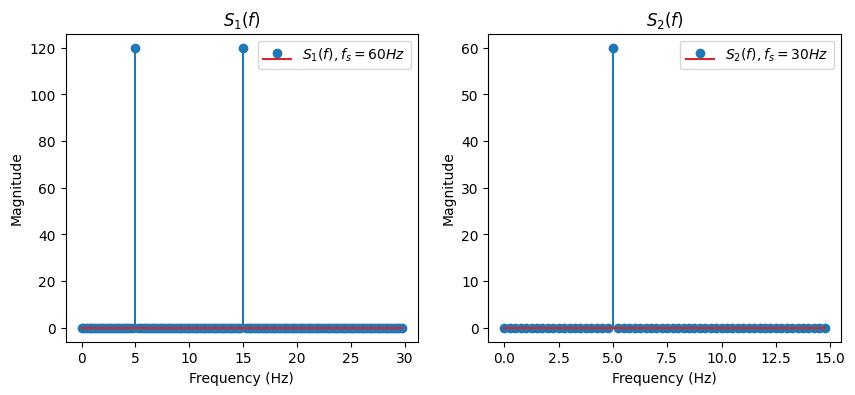

In [68]:
fs_1 = 60  # Sampling Frequency 1
fs_2 = 30   # Sampling Frequency 2

f_1 = 5 # Frequency
f_2 = 15

t_1 = np.arange(-2, 2, 1/fs_1)  # Time vector
t_2 = np.arange(-2, 2, 1/fs_2)  # Time vector

s_t_1 = np.cos(2*np.pi*f_1*t_1) + np.cos(2*np.pi*f_2*t_1)
s_t_2 = np.cos(2*np.pi*f_1*t_2) + np.cos(2*np.pi*f_2*t_2)


s_f_1, s_f_1_freq = get_FFT(s_t_1, n=len(s_t_1), fs=fs_1)
s_f_2, s_f_2_freq = get_FFT(s_t_2, n=len(s_t_2), fs=fs_2)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(s_f_1_freq, s_f_1, label=f"$S_1(f), f_s={fs_1}Hz$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("$S_1(f)$")
plt.legend(loc="upper right")

plt.subplot(1, 2, 2)
plt.stem(s_f_2_freq, s_f_2, label=f"$S_2(f), f_s={fs_2}Hz$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("$S_2(f)$")
plt.legend(loc="upper right")

<span class="fragment">
    <div class="rounded-box">
        <b>If $f_1$ and $f_2$ are close, can we separate them?</b>
    </div>
</span>

## Frequency resolution

- <span class="fragment"> What is resolution? </span>
    - <span class="fragment">Time resolution: the time interval between two consecutive samples.
    $$
    \Delta t = t_{i} - t_{i-1} = \frac{N}{T} = \frac{1}{f_s} 
    $$</span>
    - <span class="fragment"> FFT Resolution: frequency interval in FFT.
    $$
    \Delta f_{\text{FFT}} = \frac{f_s/2}{N_{\text{FFT}}/2} = \frac{f_s}{N_{\text{FFT}}}
    $$</span>
        - <span class="fragment"> $N_{\text{FFT}} \ge N$: Padding zeros to the end</span>
        - <span class="fragment">$N_{\text{FFT}} = 2^k$ (1024, 2048, ...)</span>
        - <span class="fragment"> Zero Padding does not add any new physical information</span>
        - <span class="fragment">Equivalent to interpolate in the frequency domain.</span>
    - <span class="fragment"> Real Frequency Resolution: Decided by real signal length $N$
    $$
    \Delta f = \frac{f_s}{N} = \frac{1}{T}
    $$</span>
    
    

## Frequency Resolution

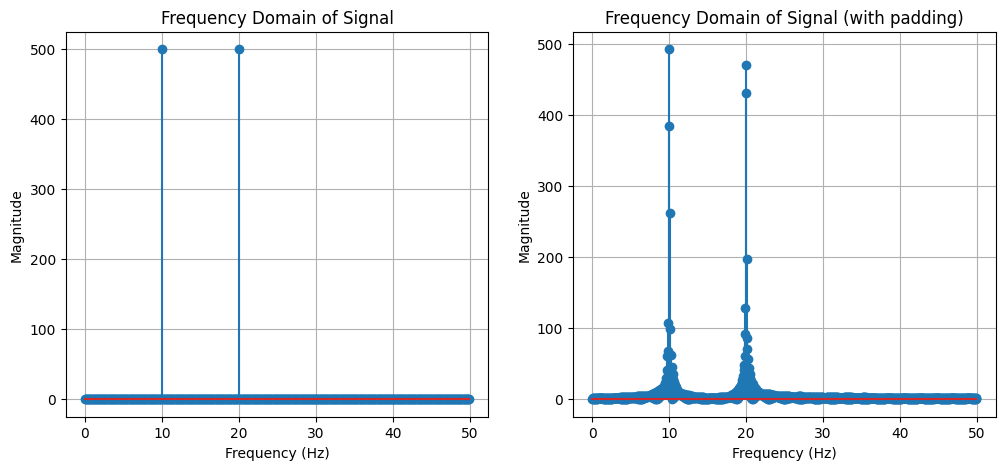

In [69]:
fs = 100
N = 1000
t = np.arange(0, N/fs, 1/fs)  # Time vector
f_1 = 10
f_2 = 20
s_t = np.cos(2*np.pi*f_1*t) + np.cos(2*np.pi*f_2*t)

s_f, s_f_freq = get_FFT(s_t, n=len(s_t), fs=fs)
s_f_pad, s_f_pad_freq = get_FFT(s_t, n=2048, fs=fs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.stem(s_f_freq, s_f, label="$S(f)$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain of Signal")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(s_f_pad_freq, s_f_pad, label="$S(f)$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain of Signal (with padding)")
plt.grid(True)

## Lab 2-4: mmWave Sensing

- Before you start, make sure you have reviewed the course contents.
- Four tasks:
    - Generate Tx signal (Lab 1)
    - Compute IF Signal 
    - Compute distance
    - Compute AoA
- For mmWave, the first two components are done by hardwares.

In [70]:
import pickle

c = 3e8           # Speed of light (m/s)
fc = 1e9          # Carrier frequency (Hz) 
B = 1.5e9         # Bandwidth (Hz)
T = 100e-6        # Chirp duration (s)
Fs = 2e6          # Sampling rate (Hz)
NUM_ANTENNAS = 4  # Number of antennas

with open("task_2_4.pickle", "rb") as f:
    rx_data = pickle.load(f)
        
num_samples = rx_data.shape[1]
print(f"rx_data.shape: {rx_data.shape}")


rx_data.shape: (4, 200)


> Generating tx:

$$
s(t) = \exp\left(j \cdot 2\pi \cdot (f_c + \dfrac{B}{2 \cdot T} \cdot t)\cdot t\right)
$$

In [71]:
# generate tx
t = np.arange(num_samples) / Fs
tx = ...
round(tx[-1].imag, 1)

-0.7

> Computing IF signal

$$
s_{\text{IF}}(t) = s(t) \cdot r^*(t)
$$

In [72]:
if_signal = ...
if_signal.shape, round(if_signal[-1][-1].imag, 1)

((4, 200), -1.3)

### Range FFT

<div style="text-align: center;">
<figure>
    <img src="./range_fft.png" alt="Range FFT" style="display: inline-block;" >
</figure>
</div>

- Distance:
    $$
    d = \frac{c \Delta f}{2 \cdot (B/T)}
    $$
- The IF signals contains the difference of frequency and phase
- Compute FFT on IF signals will get you the $\Delta f$

> Compute Distance

$$
d = \frac{c \cdot f_d \cdot T}{2 \cdot B}
$$

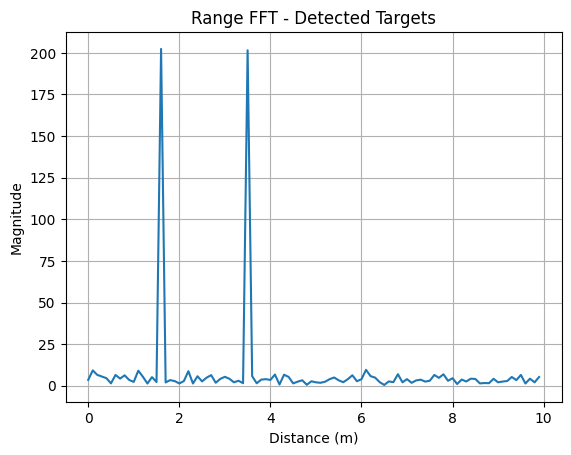

In [74]:
range_fft = ...
range_bins = ...

# Plot the range spectrum
plt.figure()
plt.plot(range_bins[:num_samples//2], np.abs(range_fft[0, :num_samples//2]))
plt.xlabel('Distance (m)')
plt.ylabel('Magnitude')
plt.title('Range FFT - Detected Targets')
plt.grid(True)
plt.show()

## Wrap Up

- Signal: How to generate signals over time
    - Amplitude, Frequency, Phase
- Frequency: How to get frequency from FFT
    - `scipy.fft`
    - `find_peaks`
    - Sampling Rate: $f_s > 2 \cdot f_{\max}$
    - Resolution: $\Delta f = \frac{f_s}{N}$
    - mmWave Sensing

## Your task

- Lab 1 (task 1)
- Lab 2 (task 2)
- Slip days apply

## Q/A